<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module23K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
X = df[['sepal_length','sepal_width']]
X.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
#Scaling
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [7]:
# k value selection kore nichi ba dhore nichi
k =3

In [8]:
kmeans = KMeans(
    n_clusters=k,
    init="k-means++",
    max_iter=300,
    random_state=42
)



In [9]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [10]:
labels =kmeans.labels_
labels[:75]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [15]:
df['cluster']=labels
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


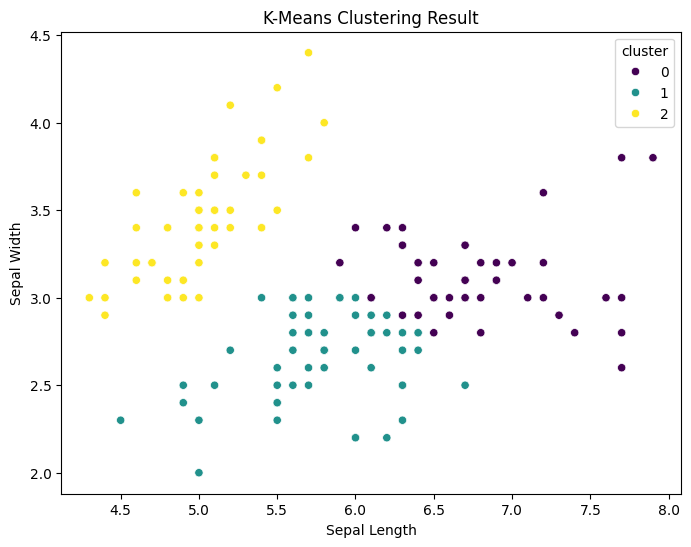

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["sepal_length"],
    y=df["sepal_width"],
    hue=df["cluster"],
    palette="viridis"
)

plt.title("K-Means Clustering Result")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [24]:
#Finding Optimal K(Elbow Method)
inertia_values =[]
k_rang = range(1,11)
for k in k_rang :
  km = KMeans(
      n_clusters=k,
      init='k-means++',
      random_state=42
  )
  km.fit(X_scaled)
  inertia_values.append(km.inertia_)

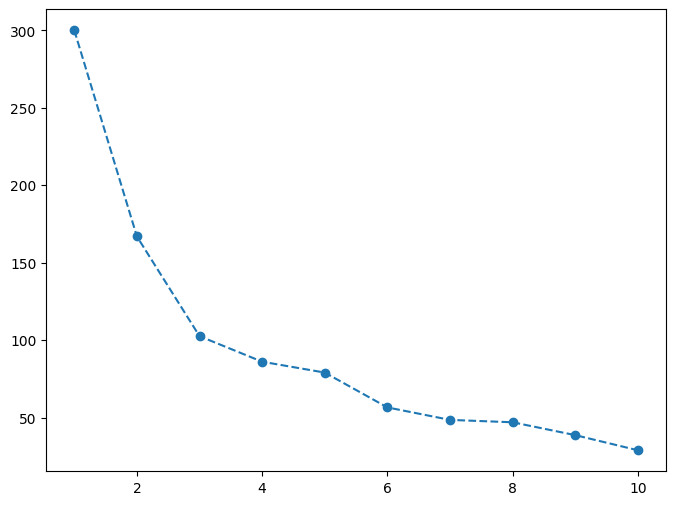

In [25]:
plt.figure(figsize=(8,6))
plt.plot(k_rang,inertia_values,marker='o',linestyle='--')
plt.show()

In [28]:
#Model Evulation
score = silhouette_score(X_scaled,labels)
print(f"Silhouette = {score}")

Silhouette = 0.43585870333974647
